# ***<font color="#FF9900">Crimes commis de 2020 à present Analyse & classification des données***

# <font color=red> Importation des outils et des données

In [1]:
# Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
# Charger le dataset 
df = pd.read_csv("Crime_Data_from_2020_to_Present.csv")
# Afficher quelques lignes du dataset pour vérifier
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,3/1/2020 0:00,3/1/2020 0:00,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,2/9/2020 0:00,2/8/2020 0:00,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 0:00,11/4/2020 0:00,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,5/10/2023 0:00,3/10/2020 0:00,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,9/9/2020 0:00,9/9/2020 0:00,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005198 entries, 0 to 1005197
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1005198 non-null  int64  
 1   Date Rptd       1005198 non-null  object 
 2   DATE OCC        1005198 non-null  object 
 3   TIME OCC        1005198 non-null  int64  
 4   AREA            1005198 non-null  int64  
 5   AREA NAME       1005198 non-null  object 
 6   Rpt Dist No     1005198 non-null  int64  
 7   Part 1-2        1005198 non-null  int64  
 8   Crm Cd          1005198 non-null  int64  
 9   Crm Cd Desc     1005198 non-null  object 
 10  Mocodes         853438 non-null   object 
 11  Vict Age        1005198 non-null  int64  
 12  Vict Sex        860416 non-null   object 
 13  Vict Descent    860404 non-null   object 
 14  Premis Cd       1005182 non-null  float64
 15  Premis Desc     1004610 non-null  object 
 16  Weapon Used Cd  327280 non-null   fl

<font color=blue>  Ce dataset contient des enregistrements d'actes criminels recensés à partir de 2020 et jusqu'à la date actuelle. Elle contient 1005198 observations et 28 variables de diverses natures :

**DR_NO** : 
- Description: Numéro de dossier unique attribué à chaque incident.
- Usage : Sert d'identifiant pour différencier chaque enregistrement.
______________________________________________________________________________________________________________________________________________________
**Date Rptd** :
- Description : Date à laquelle le crime a été signalé.
- Usage : Permet d’analyser l’évolution ou la saisonnalité des signalements de crimes.
______________________________________________________________________________________________________________________________________________________
**DATE OCC** :
- Description : Date à laquelle le crime s'est produit.
- Usage : Indique le moment réel du crime, ce qui peut différer de la date de signalement.
______________________________________________________________________________________________________________________________________________________
**TIME OCC** :
- Description : Heure à laquelle le crime s'est produit (exprimée en format 24 heures ou parfois en format « HHMM » comme 2130 pour 21h30).
- Usage : Permet d’analyser la distribution des crimes selon les moments de la journée.
______________________________________________________________________________________________________________________________________________________
**AREA** 
- Description : Code ou numéro de la zone géographique où le crime a eu lieu.
- Usage : Sert à regrouper les crimes par secteur ou région.
______________________________________________________________________________________________________________________________________________________
**AREA NAME** :
- Description : Nom de la zone ou du secteur géographique concerné.
- Usage : Plus lisible que le code, utile pour la visualisation et l'interprétation locale.
______________________________________________________________________________________________________________________________________________________
**Rpt Dist No** :
- Description : Numéro du district de rapport, indiquant l'arrondissement ou la juridiction qui a signalé l'incident.
- Usage : Peut être utilisé pour regrouper et comparer les taux de criminalité par district.
______________________________________________________________________________________________________________________________________________________
**Part 1-2** :
- Description : Indique si l'incident est classé dans la partie 1 ou 2 (souvent utilisé pour distinguer les crimes les plus graves des autres, suivant une classification locale).
- Usage : Aide à classer la gravité ou le type d'infraction.
______________________________________________________________________________________________________________________________________________________
**Crm Cd** et **Crm Cd Desc** :
- Description : Code du crime et description du crime (par exemple, « 510 » pour « VEHICLE - STOLEN » ou « 330 » pour « BURGLARY FROM VEHICLE »).
- Usage : Le code Permet d’identifier le type de crime à l’aide d’un code normalis et la description fournit plus de détails sur la nature de l'infraction.
______________________________________________________________________________________________________________________________________________________
**Mocodes** :
- Description : Codes supplémentaires liés aux méthodes ou aux détails spécifiques de l’infraction (modus operandi).
- Usage : Peut être utilisé pour des analyses détaillées sur la manière dont les crimes ont été commis
______________________________________________________________________________________________________________________________________________________
**Vict Age** :
- Description :  Âge de la victime.
- Usage : Pour étudier la distribution d'âge des victimes et éventuellement des tendances d'attaque selon l'âge.
______________________________________________________________________________________________________________________________________________________
**Vict Sex** :
- Description : Sexe de la victime (par exemple, « Male » ou « Female »).
- Usage : Permet d'analyser des disparités de genre en termes de victimisation.
______________________________________________________________________________________________________________________________________________________
**Vict Descent** :
- Description : Informations sur l'origine ethnique ou la descendance de la victime.
- Usage : Utile pour des analyses démographiques et pour étudier des disparités raciales éventuelles dans les incidents.

H (Hispanic), W (White), B (Black), NaN (NaN indique 144 794)... 
______________________________________________________________________________________________________________________________________________________
**Premis Cd** :
- Description : Code indiquant le type de lieu (ou "premises") où le crime a eu lieu.
- Usage : Sert à catégoriser les crimes selon le type d'environnement (par exemple, résidentiel, commercial).
______________________________________________________________________________________________________________________________________________________
**Premis Desc** :
- Description : Description textuelle du type de lieu.
- Usage : Donne plus de précisions sur l’environnement du crime.
______________________________________________________________________________________________________________________________________________________
**Weapon Used Cd** :
- Description : Code indiquant si une arme a été utilisée et, le cas échéant, quel type d'arme (valeurs numériques).
- Usage : Permet d’identifier et d'analyser l'utilisation d'armes dans les crimes; de nombreuses valeurs peuvent être manquantes.
______________________________________________________________________________________________________________________________________________________
**Weapon Desc** :
- Description : Description textuelle du type d'arme utilisée.
- Usage : Fournit des informations détaillées sur l'arme impliquée dans l'infraction.
______________________________________________________________________________________________________________________________________________________
**Status** et **Status Desc** :
- Description : Statut de l'enquête ou de l'incident, par exemple, « IC » pour une enquête en cours ou « AA » pour un arrestation d'adulte, avec une description qui précise cette information.
- Usage : Status permet de savoir si l'enquête est clôturée ou en cours/ Status Desc donne plus d’explications concernant le statut du dossier.
______________________________________________________________________________________________________________________________________________________
**Crm Cd 1 à Crm Cd 4** :
- Description : Une autre variable de classification pour le crime, parfois utilisée pour enregistrer des crimes complémentaires ou secondaires.
- Usage de Crm Cd 1 : Peut être combiné avec Crm Cd pour affiner l'analyse.
- Usage de Crm Cd 2 : Pour des niveaux supplémentaires de classification, lorsque disponibles.
- Usage de Crm Cd 3 : Encore une variable additionnelle pour la classification d’un crime.
- Usage de Crm Cd 4 : Une quatrième variable de classification (très peu renseignée).
______________________________________________________________________________________________________________________________________________________
**LOCATION** :
- Description : L'adresse ou la localisation textuelle du crime.
- Usage : Permet de géolocaliser les incidents et d’effectuer des analyses spatiales.
______________________________________________________________________________________________________________________________________________________
**Cross Street** :
- Description : La rue croisée mentionnée lors de la localisation du crime.
- Usage : Fournit des informations supplémentaires pour situer précisément l'incident (contient beaucoup de valeurs manquantes).
______________________________________________________________________________________________________________________________________________________
**LAT** :
- Description : Latitude du lieu du crime.
- Usage : Utile pour la cartographie et l'analyse spatiale.
______________________________________________________________________________________________________________________________________________________
**LON** :
- Description : Longitude du lieu du crime.
- Usage : À utiliser conjointement avec LAT pour localiser précisément l'incident.

***<font color="#FF9900">++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++***

# <font color=red> Prétraitement des données

<font color=blue> Calculer et afficher le pourcentage de données manquantes pour chaque colonne

In [4]:
# Calculer le pourcentage de données manquantes 
missing_percentage = df.isna().mean() * 100
print(missing_percentage)

DR_NO              0.000000
Date Rptd          0.000000
DATE OCC           0.000000
TIME OCC           0.000000
AREA               0.000000
AREA NAME          0.000000
Rpt Dist No        0.000000
Part 1-2           0.000000
Crm Cd             0.000000
Crm Cd Desc        0.000000
Mocodes           15.097523
Vict Age           0.000000
Vict Sex          14.403331
Vict Descent      14.404525
Premis Cd          0.001592
Premis Desc        0.058496
Weapon Used Cd    67.441240
Weapon Desc       67.441240
Status             0.000099
Status Desc        0.000000
Crm Cd 1           0.001094
Crm Cd 2          93.119863
Crm Cd 3          99.769797
Crm Cd 4          99.993633
LOCATION           0.000000
Cross Street      84.655461
LAT                0.000000
LON                0.000000
dtype: float64


<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

 <font color=blue> Traitement des lignes qui ont plus de 50 % de valeurs manquantes

<font color=green> **1. Nombre total de colonnes dans le DataFrame :**

In [5]:
total_columns = df.shape[1]
print("Nombre total de colonnes :", total_columns)

Nombre total de colonnes : 28


<font color=green> **2. Définir un seuil  :**

si le nombre de valeurs non-nulles dans une ligne est inférieur à (total_columns / 2), la ligne sera supprimée.

In [6]:
seuil = total_columns / 2
print("Seuil de valeurs non-nulles requis par ligne :", seuil)

Seuil de valeurs non-nulles requis par ligne : 14.0


<font color=green> **3. Supprimer les lignes qui ne respectent pas le seuil de non-nullité**

In [7]:
# La méthode dropna avec l'argument 'thresh' permet de conserver uniquement les lignes qui ont au moins 'thresh' valeurs non-nulles.
df_nettoye = df.dropna(thresh=seuil)

_____________________________________________________________________________________________________________________________________________

In [8]:
print("Nombre de lignes initialement :", len(df))
print("Nombre de lignes après suppression :", len(df_nettoye))

Nombre de lignes initialement : 1005198
Nombre de lignes après suppression : 1005198


***--> Ce résultat nous montre que toutes les lignes de mon Dataset contiennent plus de la moitié des informations nécessaires.***

<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

 <font color=blue> Déterminer les valeurs unique des attributs et le nombre de lignes y compris les valeurs NULLES

In [9]:
df['Vict Sex'].value_counts(dropna=False)

Vict Sex
M      403916
F      358599
NaN    144782
X       97786
H         114
-           1
Name: count, dtype: int64

In [10]:
# Distribution de fréquence de la variable 'Vict_Sex'
df['Vict Sex'].value_counts(normalize = True)

Vict Sex
M    0.469443
F    0.416774
X    0.113650
H    0.000132
-    0.000001
Name: proportion, dtype: float64

***--> Ce résultat montre que la majorité des victimes sont de sexe masculin (environ 54.6 %), suivies par les femmes (35.7 %), avec une proportion plus faible pour les autres catégories comme "X" (9.7 %), "H" et "-" qui sont très rares.***

<font color=blue>Vu que “X”, qui est la categorie inconnue, est significative et represente 9,7% des cas; on la garde et on supprime les lignes où Vict_Sex est 'H' ou '-'

In [11]:
df = df[~df['Vict Sex'].isin(['H', '-'])]

In [12]:
df['Vict Sex'].value_counts(normalize = True)* 100

Vict Sex
M    46.950544
F    41.682969
X    11.366487
Name: proportion, dtype: float64

***--> J'ai décidé de supprimer des ligne vu qu 'elle sont innecessaire***

<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

<font color=blue> Traitement des colonnes avec un taux de données manquantes modéré (environ 14-15 %)

<font color=green> *Pour les colonnes 'Mocodes', 'Vict Sex' et 'Vict Descent', j'ai imputer les valeurs manquantes avec la valeur la plus fréquente (mode)*

In [13]:
for col in ['Mocodes', 'Vict Sex', 'Vict Descent']:
    # Remplir les valeurs manquantes avec le mode de la colonne
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9820\1627187165.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

<font color=blue> Traitement des colonnes avec un taux très élevé de données manquantes

In [14]:
columns_to_drop = ['Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street']
df.drop(columns=columns_to_drop, inplace=True)

<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

<font color=blue> Traitement des colonnes concernant l'utilisation d'armes (67 % de valeurs manquantes)

In [15]:
# les supprimer pour simplifier l'analyse.
df.drop(columns=['Weapon Used Cd', 'Weapon Desc'], inplace=True)

<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

<font color=blue> Conversion des colonnes de dates en type datetime

<font color=green> *Convertir 'Date Rptd' et 'DATE OCC' en datetime pour faciliter l'analyse chronologique*

In [16]:
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

<font color=blue> Renommer les colonnes pour éviter les espaces et faciliter la manipulation

In [17]:
df.rename(columns={
    'Date Rptd': 'Date_Rptd',
    'DATE OCC': 'DATE_OCC',
    'TIME OCC': 'TIME_OCC',
    'AREA NAME': 'AREA_NAME',
    'Rpt Dist No': 'Rpt_Dist_No',
    'Part 1-2': 'Part_1_2',
    'Crm Cd Desc': 'Crm_Cd_Desc',
    'Vict Age': 'Vict_Age',
    'Vict Sex': 'Vict_Sex',
    'Vict Descent': 'Vict_Descent',
    'Premis Cd': 'Premis_Cd',
    'Premis Desc': 'Premis_Desc',
    'Status Desc': 'Status_Desc' }, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005083 entries, 0 to 1005197
Data columns (total 22 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   DR_NO         1005083 non-null  int64         
 1   Date_Rptd     1005083 non-null  datetime64[ns]
 2   DATE_OCC      1005083 non-null  datetime64[ns]
 3   TIME_OCC      1005083 non-null  int64         
 4   AREA          1005083 non-null  int64         
 5   AREA_NAME     1005083 non-null  object        
 6   Rpt_Dist_No   1005083 non-null  int64         
 7   Part_1_2      1005083 non-null  int64         
 8   Crm Cd        1005083 non-null  int64         
 9   Crm_Cd_Desc   1005083 non-null  object        
 10  Mocodes       1005083 non-null  object        
 11  Vict_Age      1005083 non-null  int64         
 12  Vict_Sex      1005083 non-null  object        
 13  Vict_Descent  1005083 non-null  object        
 14  Premis_Cd     1005067 non-null  float64       
 15  Pre

<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

In [19]:
missing_percentage = df.isna().mean() * 100
print(missing_percentage)

DR_NO           0.000000
Date_Rptd       0.000000
DATE_OCC        0.000000
TIME_OCC        0.000000
AREA            0.000000
AREA_NAME       0.000000
Rpt_Dist_No     0.000000
Part_1_2        0.000000
Crm Cd          0.000000
Crm_Cd_Desc     0.000000
Mocodes         0.000000
Vict_Age        0.000000
Vict_Sex        0.000000
Vict_Descent    0.000000
Premis_Cd       0.001592
Premis_Desc     0.058503
Status          0.000099
Status_Desc     0.000000
Crm Cd 1        0.001094
LOCATION        0.000000
LAT             0.000000
LON             0.000000
dtype: float64


<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

In [20]:
df.to_csv("Crime_Data_Cleaned.csv", index=False)
print("\nLe fichier 'Crime_Data_Cleaned.csv' a été sauvegardé avec succès.")


Le fichier 'Crime_Data_Cleaned.csv' a été sauvegardé avec succès.


***<font color="#FF9900">++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++***

# <font color=red> Paramètres statistiques usuels

In [21]:
# chargement de la version propre du dataset 
dfc = pd.read_csv("Crime_Data_Cleaned.csv")
# Afficher quelques lignes du dataset pour vérifier
dfc.head()

,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rpt_Dist_No,Part_1_2,Crm Cd,Crm_Cd_Desc,...,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Status,Status_Desc,Crm Cd 1,LOCATION,LAT,LON
0,190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,M,O,101.0,STREET,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002
3,200907217,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,M,O,405.0,CLOTHING STORE,IC,Invest Cont,343.0,14000 RIVERSIDE DR,34.1576,-118.4387
4,200412582,2020-09-09,2020-09-09,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,M,H,101.0,STREET,IC,Invest Cont,510.0,200 E AVENUE 28,34.0820,-118.2130


<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

In [22]:
# moyen d'age des victime
dfc['Vict_Age'].mean()

28.911589391124913

<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

In [23]:
# médian d'age des victime
dfc['Vict_Age'].median()

30.0

<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

In [24]:
# Ecart-type de la variable 'Vict_Age'
dfc['Vict_Age'].std()

21.99423259185275

<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

In [25]:
# Table de statistiques descriptives
dfc.describe(include = 'all')

,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rpt_Dist_No,Part_1_2,Crm Cd,Crm_Cd_Desc,...,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Status,Status_Desc,Crm Cd 1,LOCATION,LAT,LON
count,1.005083e+06,1005083,1005083,1.005083e+06,1.005083e+06,1005083,1.005083e+06,1.005083e+06,1.005083e+06,1005083,...,1005083,1005083,1.005067e+06,1004495,1005082,1005083,1.005072e+06,1005083,1.005083e+06,1.005083e+06
unique,NaN,1906,1901,NaN,NaN,21,NaN,NaN,NaN,140,...,3,20,NaN,306,6,6,NaN,66567,NaN,NaN
top,NaN,2023-02-02,2020-01-01,NaN,NaN,Central,NaN,NaN,NaN,VEHICLE - STOLEN,...,M,H,NaN,STREET,IC,Invest Cont,NaN,800 N ALAMEDA ST,NaN,NaN
freq,NaN,929,1164,NaN,NaN,69669,NaN,NaN,NaN,115247,...,548698,441202,NaN,261366,803844,803844,NaN,2598,NaN,NaN
mean,2.202276e+08,NaN,NaN,1.339915e+03,1.069091e+01,NaN,1.115549e+03,1.400285e+00,5.001551e+02,NaN,...,NaN,NaN,3.056154e+02,NaN,NaN,NaN,4.999156e+02,NaN,3.399820e+01,-1.180909e+02
std,1.320285e+07,NaN,NaN,6.510446e+02,6.110360e+00,NaN,6.111709e+02,4.899564e-01,2.052656e+02,NaN,...,NaN,NaN,2.193147e+02,NaN,NaN,NaN,2.050661e+02,NaN,1.610640e+00,5.582131e+00
min,8.170000e+02,NaN,NaN,1.000000e+00,1.000000e+00,NaN,1.010000e+02,1.000000e+00,1.100000e+02,NaN,...,NaN,NaN,1.010000e+02,NaN,NaN,NaN,1.100000e+02,NaN,0.000000e+00,-1.186676e+02
25%,2.106169e+08,NaN,NaN,9.000000e+02,5.000000e+00,NaN,5.870000e+02,1.000000e+00,3.310000e+02,NaN,...,NaN,NaN,1.010000e+02,NaN,NaN,NaN,3.310000e+02,NaN,3.401470e+01,-1.184305e+02
50%,2.209160e+08,NaN,NaN,1.420000e+03,1.100000e+01,NaN,1.139000e+03,1.000000e+00,4.420000e+02,NaN,...,NaN,NaN,2.030000e+02,NaN,NaN,NaN,4.420000e+02,NaN,3.405890e+01,-1.183225e+02
75%,2.311105e+08,NaN,NaN,1.900000e+03,1.600000e+01,NaN,1.613000e+03,2.000000e+00,6.260000e+02,NaN,...,NaN,NaN,5.010000e+02,NaN,NaN,NaN,6.260000e+02,NaN,3.416490e+01,-1.182739e+02


Ce tableau de statistiques descriptives révèle pour chaque variable :

La taille effective : toutes les colonnes “nettoyées” comptent environ 1 005 083 valeurs non manquantes, ce qui confirme que le nettoyage a bien supprimé ou imputé les manques initiaux.

Les variables qualitatives :

“AREA_NAME” recense 21 quartiers, avec “Central” en tête (69 669 occurrences).

“Crm_Cd_Desc” comporte 140 libellés de crime, dont “VEHICLE – STOLEN” (115 247 fois) est le plus fréquent.

“Vict_Sex” ne compte plus que 3 modalités (« M », « F », « X »), “M” dominant à 548 698.

Les variables numériques :

“TIME_OCC” (heure d’occurrence) a une moyenne d’environ 13 h 39 (1 339) et un écart-type de 651, indiquant une large répartition des heures de crime.

“AREA” (code secteur) et “Crm_Cd” (code infraction) oscillent respectivement autour de 10,7 et 500, avec des dispersions modérées.

“LAT”/“LON” confirment la localisation moyenne à 34,398° N et –118,181° W.

En somme, ces descripteurs confirment la cohérence du dataset nettoyé, la diversité géographique et criminelle des enregistrements, et fournissent une base fiable pour explorer plus finement les relations entre quartiers, types d’infraction, victimes et temporalité

***<font color="#FF9900">++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++***

# <font color=red> Analyse exploratoire des données

<font color=#006400> 1| Distribution de l'age
-

In [26]:
pct_age_zero = (dfc['Vict_Age'] == 0).mean() * 100
print(f"Pourcentage de victimes avec âge = 0 : {pct_age_zero:.2f}%")

Pourcentage de victimes avec âge = 0 : 26.80%


C:\Users\lenovo\AppData\Local\Temp\ipykernel_9820\1149004191.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


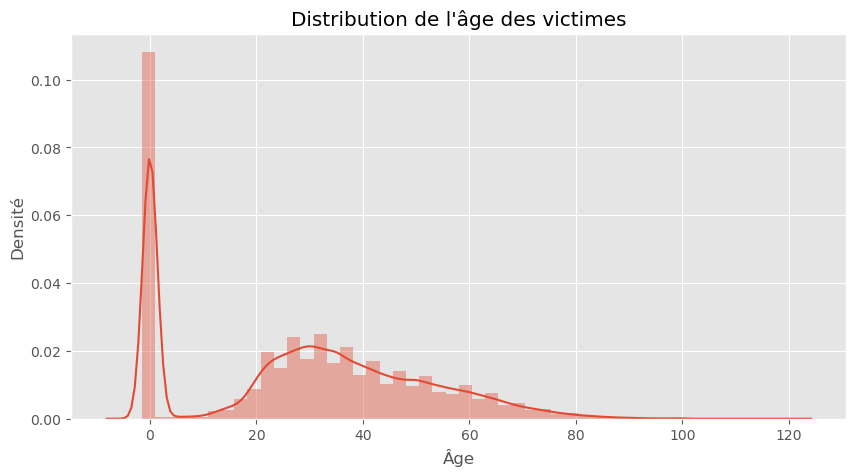

In [27]:
plt.figure(figsize=(10, 5))
# Remplacez 'fare' par la colonne d'âge ; ici pour le dataset des crimes on utilise 'Vict_Age'
sns.distplot(
    dfc["Vict_Age"].dropna(), 
    kde=True
).set_title("Distribution de l'âge des victimes")

plt.xlabel("Âge")
plt.ylabel("Densité")
plt.show()

<font color=#0000AC> Une énorme barre à 0
- Cette première barre regroupe toutes les valeurs Vict_Age = 0 se qui signifie seullement qu'il s’agit de valeurs manquantes codées « 0 ».

<font color=#0000AC> La forme générale de la distribution

Pour les âges réels (> 0), on voit une distribution asymétrique à droite :
- Le pic de densité se situe autour de 30–35 ans (densité ≈ 0,02),
- Puis la fréquence des victimes décroît progressivement au-delà de cet âge.

<font color=#0000AC> Interprétation
- Environ 2 % des victimes ont entre 30 et 35 ans (la densité de cette barre est 0,02).
- Au total, la somme des aires de toutes les barres vaut 1, ce qui correspond aux 100 % des individus pris en compte.

- <font color=#D2009B> Creux autour de 10–15 ans :

On observe peu de victimes dans ces tranches d’âge, ce qui peut s’expliquer par des risques de victimisation plus faibles chez les préadolescents.

- <font color=#D2009B>Second pic entre 25 et 40 ans :

C’est la tranche d’âge adulte la plus touchée, avec un maximum autour de 30–35 ans, probablement parce que les adultes jeunes et d’âge moyen sont plus exposés (travail, vie sociale, déplacements).

- <font color=#D2009B>Décroissance progressive au-delà de 40–50 ans :

Le risque ou l’exposition diminue avec l’âge, d’où une densité plus faible pour les seniors.

<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

<font color=#006400> 2| Variation des incidents par secteur
-

In [28]:
# Calculer la répartition des incidents par secteur
counts = dfc['AREA_NAME'].value_counts()

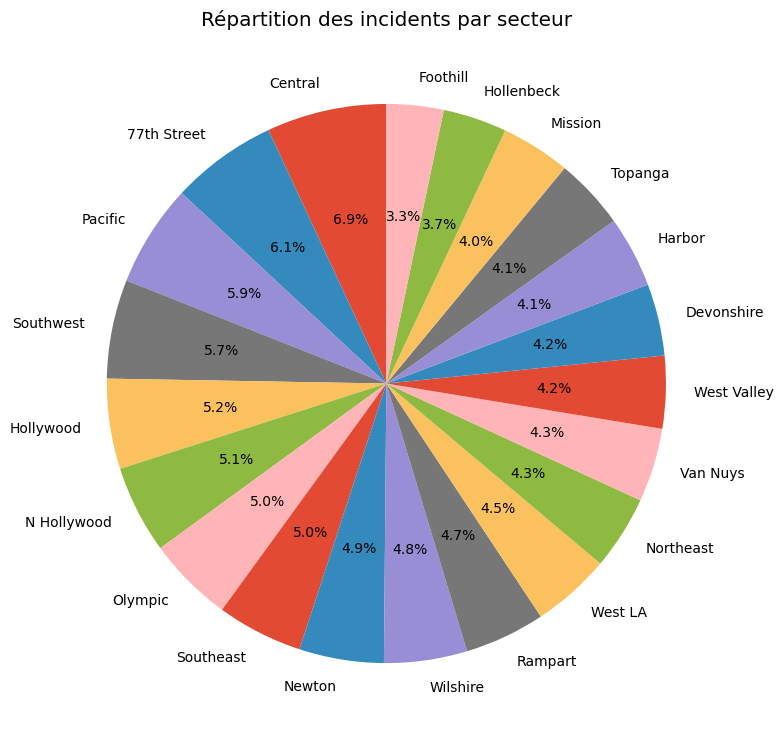

In [29]:
# Tracer le pie chart
plt.figure(figsize=(8, 8))
counts.plot.pie(
    autopct='%1.1f%%',    # Affiche les pourcentages avec une décimale
    startangle=90,        # Démarre le premier secteur à 90°
    legend=False          # On n'affiche pas la légende automatique
)

plt.ylabel('')             
plt.title("Répartition des incidents par secteur")
plt.tight_layout()
plt.show()

On voit que la répartition des incidents par secteur est assez homogène, les pourcentages allant de **3,30 % (Foothill)** à **6,93 % (Central)**, avec :
- Central (6,93 %) et 77th Street (6,14 %) en tête ;
- Hollywood (5,22 %), Pacific (5,92 %) et Southwest (5,72 %) juste derrière ;
- Foothill (3,30 %), Mission (4,02 %) et Topanga (4,12 %) en bas de l’échelle.

***→ Les secteurs Central et 77th Street concentrent le plus d’affaires criminelles brutes, tandis que Foothill, Mission et Topanga en comptent le moins.***

<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

<font color=#006400> 3| Évolution temporelle des signalements vs date
-

In [30]:
# S’assurer que la colonne 'Date_Rptd' est bien au format datetime
dfc['Date_Rptd'] = pd.to_datetime(dfc['Date_Rptd'], errors='coerce')

In [31]:
# Regrouper par date (seulement la partie date) et compter les incidents
daily_counts = dfc.groupby(dfc['Date_Rptd'].dt.date).size()

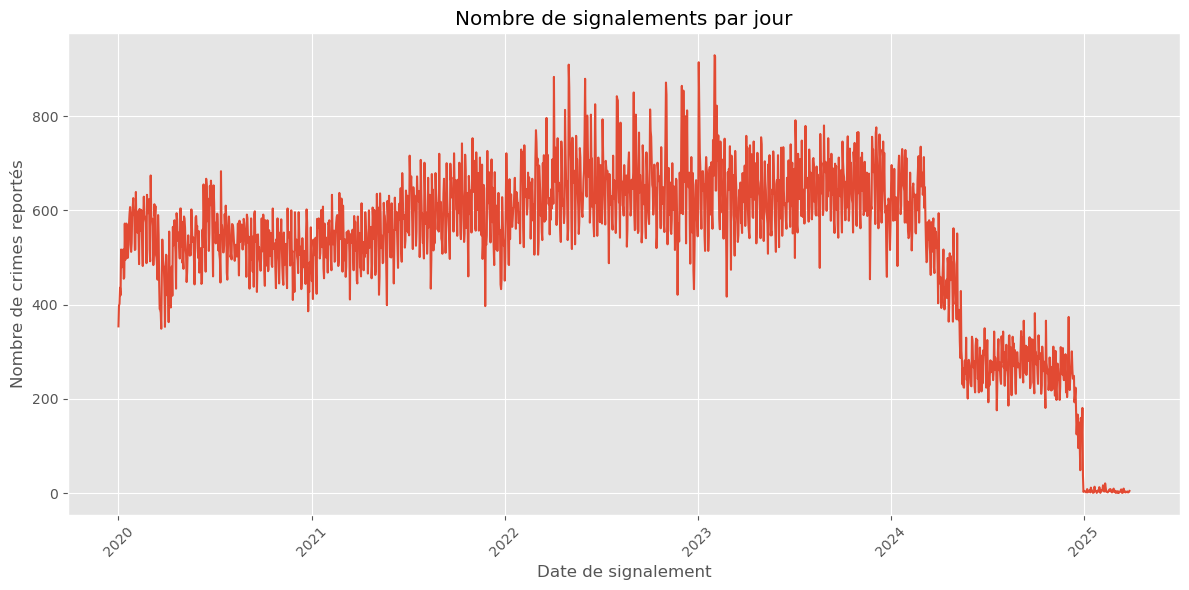

In [32]:
# Tracer l'évolution temporelle
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values)
plt.title("Nombre de signalements par jour")
plt.xlabel("Date de signalement")
plt.ylabel("Nombre de crimes reportés")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Le graphe montre l’évolution quotidienne du nombre de crimes recensés de début 2020 à aujourd’hui, avec d’abord une oscillation autour de 450–550 signalements/jour puis une montée régulière jusqu’à 600–750 entre mi-2021 et fin 2022 (marquée par des fluctuations hebdomadaires typiques), suivie au début 2024 d’une chute marquée vers environ 300 signalements/jour, avant un quasi-effondrement des valeurs à la toute fin. 

***-->cela reflète vraisemblablement un manque de couverture des données récentes plutôt qu’une disparition soudaine de la criminalité.***

<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

<font color=#006400> 4| Distribution horaire des crimes
-

In [33]:
# Extraire l’heure de l’incident au format entier (00–23)
dfc['Hour'] = (dfc['TIME_OCC'] // 100).clip(0, 23)

In [34]:
# Compter le nombre de cas par heure
hourly_counts = dfc['Hour'].value_counts().sort_index()

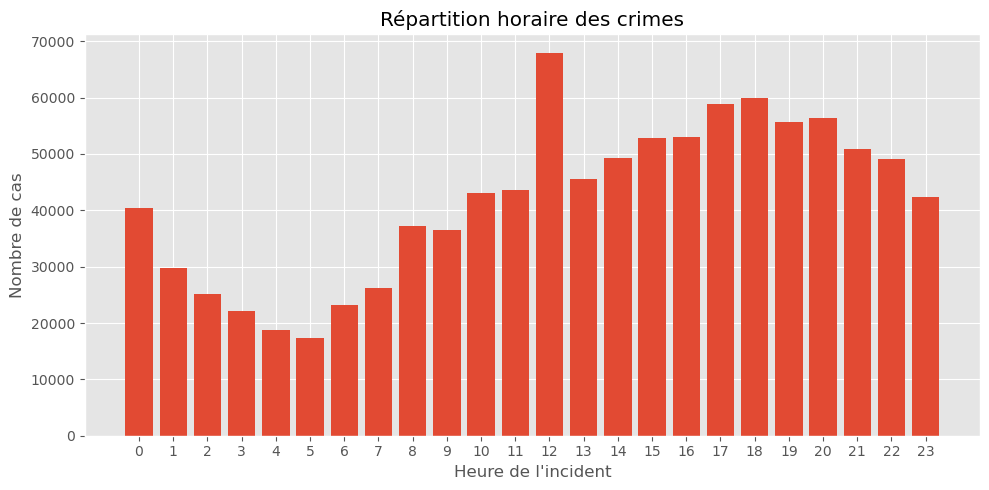

In [35]:
# Tracer la répartition horaire
plt.figure(figsize=(10, 5))
plt.bar(hourly_counts.index, hourly_counts.values, width=0.8)
plt.title("Répartition horaire des crimes")
plt.xlabel("Heure de l'incident")
plt.ylabel("Nombre de cas")
plt.xticks(range(0, 24))  # Afficher toutes les heures de 0 à 23
plt.tight_layout()
plt.show()

Ce graphique montre la répartition horaire des signalements de crimes sur l’ensemble de la période étudiée, avec un pic net à midi (~ 65 000 cas), suivi d’un plateau élevé entre 14 h et 20 h (entre 50 000 et 60 000 cas), puis une décrue progressive à partir de 21 h jusqu’à 5 h du matin où l’on observe le minimum (~ 18 000 – 20 000 cas), avant une remontée rapide entre 6 h et 11 h. 

***-->Cette courbe traduit une forte activité criminelle pendant les heures de jour et de fin d’après-midi, un creux la nuit et un rebond dès le début de la matinée.***

<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

<font color=#006400> 5| Sexe × Descendance
-

In [36]:
# Calculer la proportion de chaque sexe pour chaque origine ethnique
ct = pd.crosstab(dfc['Vict_Descent'], dfc['Vict_Sex'], normalize='index')

In [37]:
# Convertir en DataFrame longue pour seaborn
prop_df = ct.reset_index().melt(
    id_vars='Vict_Descent', 
    var_name='Vict_Sex', 
    value_name='Proportion'
)

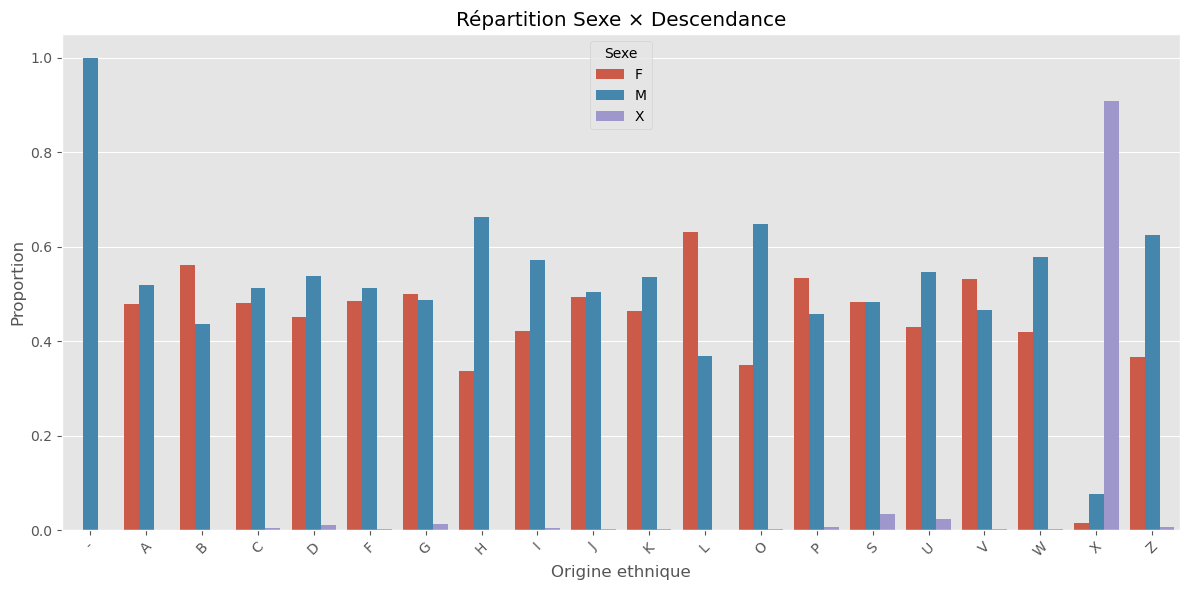

In [38]:
# Tracer la répartition Sexe × Descendance
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Vict_Descent', 
    y='Proportion', 
    hue='Vict_Sex', 
    data=prop_df
)
plt.title("Répartition Sexe × Descendance")
plt.xlabel("Origine ethnique")
plt.ylabel("Proportion")
plt.xticks(rotation=45)  # Pour une meilleure lisibilité si nécessaire
plt.legend(title="Sexe")
plt.tight_layout()
plt.show()

***--> Ce graphique montre quel que soit le groupe d’origine, la majorité des victimes recensées est de sexe masculin, et les proportions hommes/femmes restent très comparables d’une origine à l’autre.***

<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

<font color=#006400> 6| Âge des victimes par secteur
-

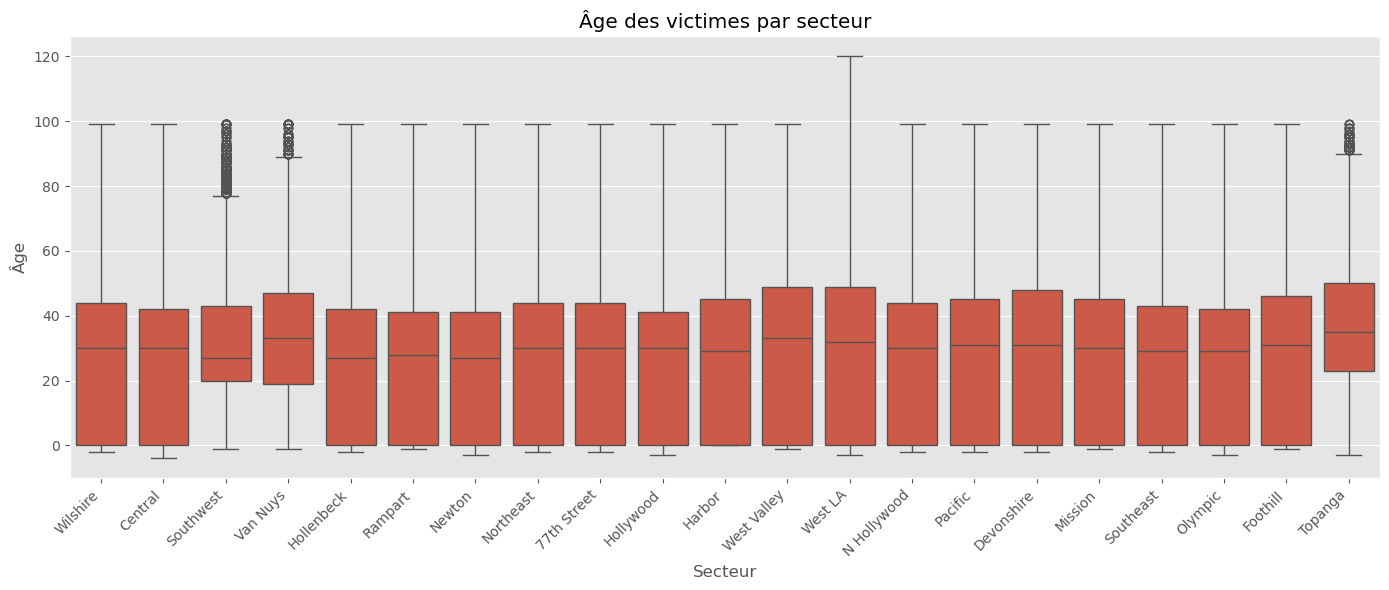

In [39]:
plt.figure(figsize=(14, 6))
sns.boxplot(
    x='AREA_NAME', 
    y='Vict_Age', 
    data=dfc[dfc['Vict_Age'].notna()]
)
plt.title("Âge des victimes par secteur")
plt.xlabel("Secteur")
plt.ylabel("Âge")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

on y voit que la médiane tourne généralement autour de 30–35 ans dans la plupart des quartiers, avec une dispersion comprise entre environ 15 et 50 ans. 

Certains secteurs comme West Valley et Topanga présentent des victimes plus âgées (médiane proche de 40–45 ans) et des étendues supérieures jusqu’à 120 ans. 

On observe également de nombreux outliers, témoignant de cas isolés de victimes très jeunes ou très âgées, ce qui souligne la variabilité de l’âge des victimes d’un secteur à l’autre.

<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

<font color=#006400> 7| La gravité (Part 1–2) par type de crime
-

<Figure size 1000x800 with 0 Axes>

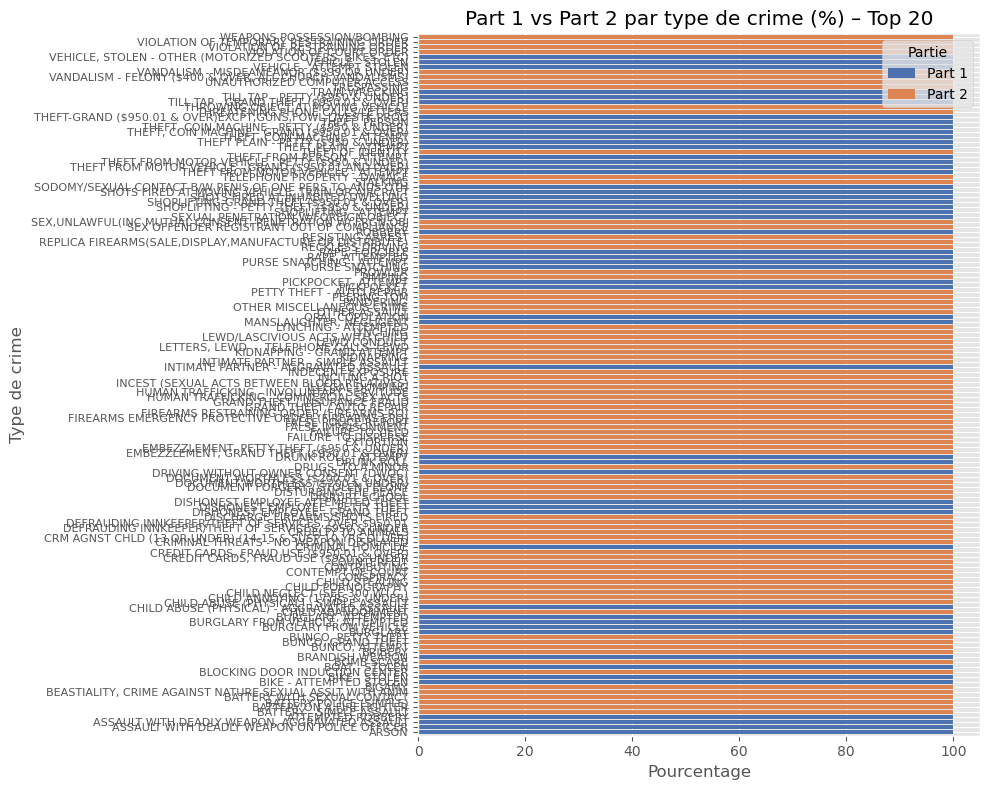

In [40]:
# 1. Comptage des occurrences Part 1 vs Part 2 par type de crime
counts = (
    dfc
    .groupby(['Crm_Cd_Desc', 'Part_1_2'])
    .size()
    .reset_index(name='n')
)

# 2. Calcul du pourcentage pour chaque type de crime
counts['pct'] = counts.groupby('Crm_Cd_Desc')['n'].transform(lambda x: x / x.sum() * 100)

# 3. Pivot pour format « wide » : index = Crm_Cd_Desc, colonnes = Part_1_2
pivot = counts.pivot(index='Crm_Cd_Desc', columns='Part_1_2', values='pct').fillna(0)
# On ne garde que les 20 premiers types de crime (les plus fréquents en Part 1 ici)
top_n = 1000
pivot_top = pivot.head(top_n)

plt.figure(figsize=(10, 8))
ax = pivot_top.plot.barh(
    stacked=True,
    color={1: '#4c72b0', 2: '#dd8452'},
    width=0.8,
    figsize=(10, 8)
)

# Ajustements pour les labels
ax.set_title("Part 1 vs Part 2 par type de crime (%) – Top 20")
ax.set_xlabel("Pourcentage")
ax.set_ylabel("Type de crime")
ax.legend(title="Partie", labels=["Part 1", "Part 2"])
plt.yticks(rotation=0, fontsize=8)     # texte horizontal, plus petit
plt.tight_layout()
plt.show()


diagramme en barres empilées horizontales montre que les crimes les plus graves (homicide, viol, vol à main armée, cambriolage, etc.) sont systématiquement classés Part 1 (barres sombres à 100 %), tandis que les délits mineurs ou réglementaires (infractions à la circulation, fraudes de faible montant, vandalisme léger, etc.) tombent essentiellement en Part 2 (barres claires prédominantes), et que d’autres catégories se répartissent plus ou moins équitablement entre les deux parties.

***--> ce graphique montre que la majorite des crimes dans notre dataset sont des infractions mineurs.***

<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

<font color=#006400> 8| Matrice de corrélation des variables numériques
-

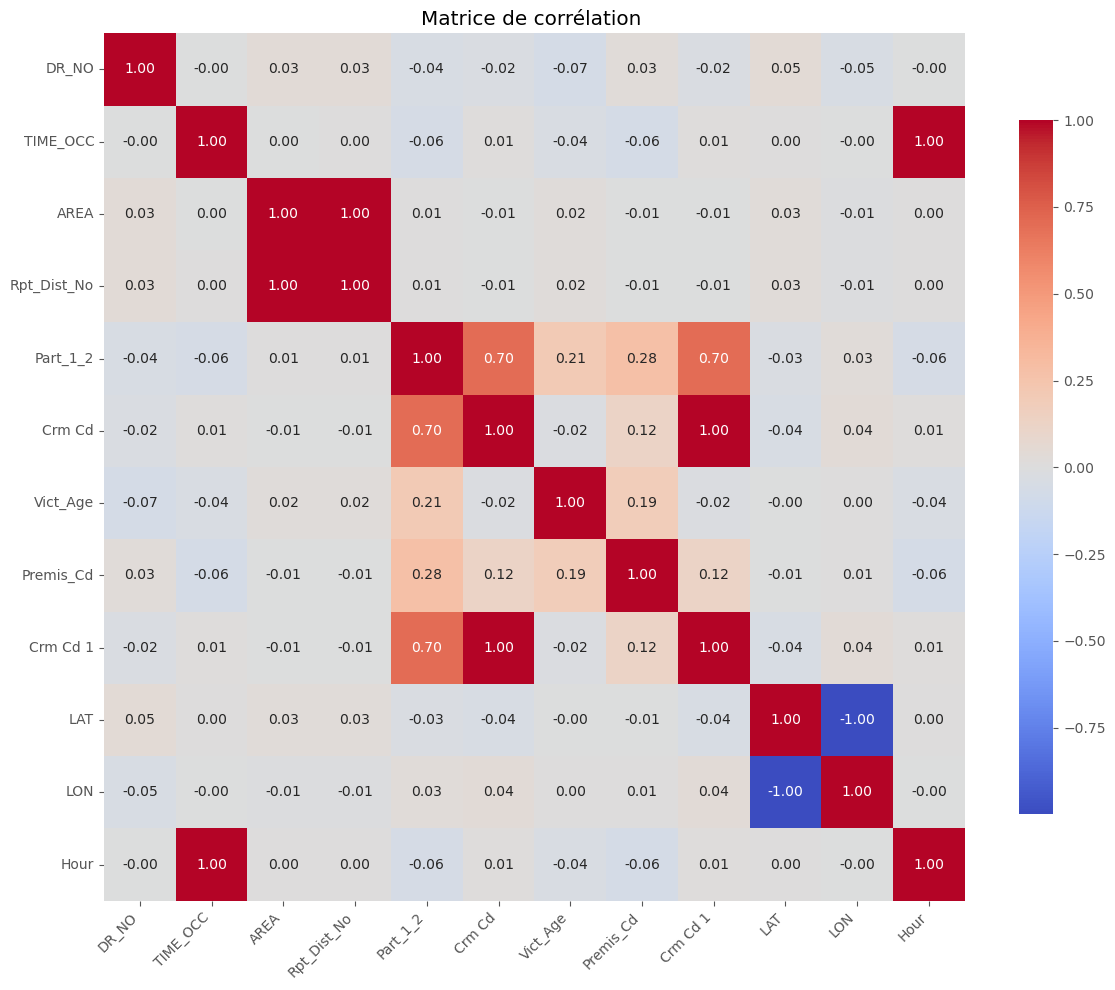

In [41]:
#Sélection des colonnes numériques
numeric_cols = dfc.select_dtypes(include=['int64', 'float64']).columns

# Calcul de la matrice de corrélation
corr_matrix = dfc[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,        # affiche les valeurs de corrélation
    fmt=".2f",         # format à 2 décimales
    cmap="coolwarm",   # palette bleu-rouge
    cbar_kws={"shrink": 0.8}  # réduit la taille de la barre de couleur
)
plt.title("Matrice de corrélation ")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

cette matrice nous montre avec plus de détail les relation entre les variable de notre jeux de données:

***Quasi-multicolinéarité entre les codes catégoriels***
- Les variables AREA, Rpt_Dist_No, Part_1_2, Crm.Cd et Crm.Cd.1 sont presque toutes à 1 (rouge sombre) entre elles : elles portent en fait la même information, codée différemment.
- Premis_Cd est aussi modérément corrélée (~0,2–0,3) avec ces codes de crime.

***Variables numériques « vraies » peu corrélées***
- Vict_Age n’a que de très faibles corrélations (±0,02) avec les autres variables : l’âge ne semble pas lié aux codes de crime ou à la localisation.
- TIME_OCC est pratiquement orthogonal (corrélation ≃ 0) à tout le reste, ce qui indique qu’il n’est pas aligné sur les mêmes structures de variance.

***Longitude vs latitude***
- La corrélation presque parfaite –1 entre LAT et LON est probablement un artefact de votre codage ou d’un découpage très linéaire des zones géographiques ; en tout cas, ce ne sont pas deux dimensions indépendantes de la localisation.

***ID unique non informatif***
- DR_NO (identifiant d’enregistrement) est corrélé à 1 avec lui-même, mais à presque 0 avec toutes les autres variables : c’est normal, c’est une clé sans lien statistique.

***<font color="#FF9900">++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++***

# <font color=red> Pré-entraînement

<font color=#006400> 1| Importation de bibliothèques
-

In [44]:
from scipy.stats import chi2_contingency, pearsonr
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

<font color=#006400> 2| Indexing Target Column (Part_1_2 → 0/1)
-

In [45]:
# 1 = Part 1 (crimes graves), 2 = Part 2 (moins graves) → on passe à binaire 0/1
dfc['Severity'] = dfc['Part_1_2'].map({1: 1, 2: 0})

<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

<font color=#006400> 2| Test du Chi-squared de chaque caractéristique catégorielle par rapport à la cible
-

In [46]:
categorical_cols = ['AREA_NAME', 'Crm_Cd_Desc', 'Vict_Sex', 'Vict_Descent', 'Status', 'Status_Desc']
chi2_results = {}
for col in categorical_cols:
    contingency = pd.crosstab(dfc[col], dfc['Severity']) #On construit un tableau de contingence entre les modalités de la variable et la cible
    chi2, p, _, _ = chi2_contingency(contingency)# On applique le test du Chi-2 d’indépendance sur ce tableau
    chi2_results[col] = p

In [47]:
# On trie les résultats par p-value croissante (les plus significatives en premier)
chi2_sorted = sorted(chi2_results.items(), key=lambda x: x[1])
print("1.2 Chi-squared p-values (low → high):")
for col, p in chi2_sorted:
    print(f"  {col}: p = {p:.3e}")

1.2 Chi-squared p-values (low → high):
  AREA_NAME: p = 0.000e+00
  Crm_Cd_Desc: p = 0.000e+00
  Vict_Sex: p = 0.000e+00
  Vict_Descent: p = 0.000e+00
  Status: p = 0.000e+00
  Status_Desc: p = 0.000e+00


Toutes les p-values étant quasiment nulles (≪ 0,05), on peut rejeter l’hypothèse nulle d’indépendance pour chacune des variables catégorielles testées. 

***-->la gravité de l’infraction (Part 1 vs Part 2) dépend significativement de tous les variables catégorielles, ce qui montre que ces variables apportent chacune une information utile pour prédire la sévérité du crime.***

<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

<font color=#006400> 3| Test de corrélation des caractéristiques numériques par rapport à la cible
-

In [48]:
numeric_cols = ['TIME_OCC', 'AREA', 'Rpt_Dist_No', 'Vict_Age', 'Premis_Cd', 'LAT', 'LON', 'Crm Cd']
corr_results = {}
for col in numeric_cols:
    # dropna pour eviter les erreurs
    valid = dfc[[col, 'Severity']].dropna()
    r, p = pearsonr(valid[col], valid['Severity'])#calcule le coefficient de corrélation linéaire r entre la variable numérique et la cible "Severity" 
    corr_results[col] = r

In [49]:
# Trier par corrélation absolue décroissante
corr_sorted = sorted(corr_results.items(), key=lambda x: abs(x[1]), reverse=True)
print("\n1.3 Pearson correlations (strongest → weakest):")
for col, r in corr_sorted:
    print(f"  {col}: r = {r:.3f}")


1.3 Pearson correlations (strongest → weakest):
  Crm Cd: r = -0.698
  Premis_Cd: r = -0.280
  Vict_Age: r = -0.206
  TIME_OCC: r = 0.057
  LON: r = -0.029
  LAT: r = 0.029
  AREA: r = -0.008
  Rpt_Dist_No: r = -0.008


<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

Le test de corrélation de Pearson montre que:
- **Crm Cd** est la variable la plus liée à la gravité (r ≈ −0,698), indiquant qu’un certain codage des infractions distingue fortement Part 1 et Part 2
- **Premis_Cd** (r ≈ −0,280) et **Vict_Age** (r ≈ −0,206) présentent des corrélations négatives modérées, suggérant que le type de lieu et l’âge de la victime ont une influence réelle sur la sévérité.
- **TIME_OCC** (r ≈ 0,057) n’a qu’un effet très faible, et **LAT** et **LON** (r ≈ ±0,03) ainsi que **AREA** et **Rpt_Dist_No** (r ≈ −0,008) montrent des corrélations négligeables, ce qui signifie que ni l’heure ni la position ou le numéro de secteur n’expliquent de manière linéaire la gravité de l’infraction.

***<font color="#FF9900">++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++***

# <font color=red> TRAINING

<font color=#006400> 1| Diviser les données en ensembles d'entraînement et de test
-

In [50]:
# 2.0 Split data into training and testing sets
X = dfc.drop(columns=['Part_1_2', 'Severity', 'DR_NO', 'Date_Rptd', 'DATE_OCC', 'LOCATION'])
y = dfc['Severity']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

<font color=#006400> 2| Préprocesseur : imputation + scaling + one-hot encoding
-

In [49]:
numeric_features = ['TIME_OCC', 'AREA', 'Rpt_Dist_No', 'Vict_Age', 'Premis_Cd', 'LAT', 'LON']
categorical_features = ['AREA_NAME', 'Crm_Cd_Desc', 'Vict_Sex', 'Vict_Descent', 'Status', 'Status_Desc']

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),       # remplace NaN par la moyenne
    ('scaler', StandardScaler())                       # standardisation assurant que les modèles ne soient pas biaisés par l’échelle des données.
])
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # remplace tout NaN catégoriel par la modalité la plus fréquente de la colonne.
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # convertit chaque catégorie en colonnes binaires (0/1), en ignorant proprement les modalités inconnues au moment de la prédiction.
])
#regrouper les deux pipelines :
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features),
])

<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

<font color=#006400> 3| Pipeline Logistic Regression
-

In [50]:
lr_pipeline = Pipeline([
    ('preproc', preprocessor), # applique le préprocesseur
    ('clf', LogisticRegression(max_iter=500)) # indique le classifieur : une régression logistique limitée à 500 itérations
])
# entraîner le pipeline sur les données d’entraînement (X_train, y_train)
lr_pipeline.fit(X_train, y_train)

# utiliser le pipeline pour prédire la gravité (Part 1/Part 2) sur X_test
y_pred_lr = lr_pipeline.predict(X_test)

<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

<font color=#006400> 4| Pipeline Decision Tree
-

In [51]:
dt_pipeline = Pipeline([
    ('preproc', preprocessor),
    ('clf', DecisionTreeClassifier(random_state=42))
])
dt_pipeline.fit(X_train, y_train)
y_pred_dt = dt_pipeline.predict(X_test)

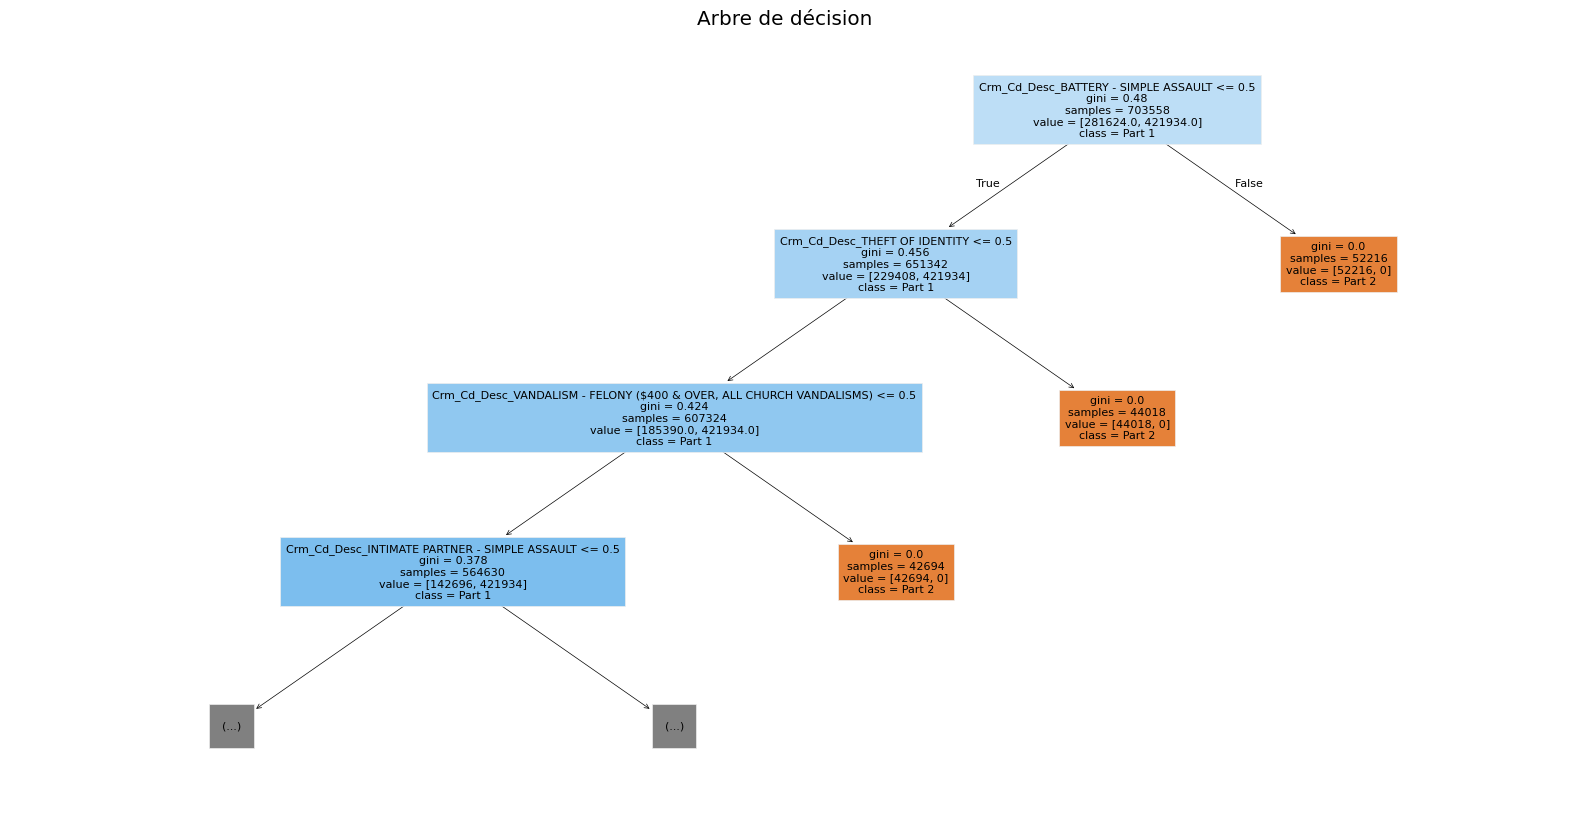

In [52]:
from sklearn import tree

# (Re)fit du pipeline Decision Tree pour s'assurer que tout est en place
dt_pipeline.fit(X_train, y_train)

# Extraction du préprocesseur et du modèle entraîné
preprocessor = dt_pipeline.named_steps['preproc']
dt_model     = dt_pipeline.named_steps['clf']

# Construction des noms de features après transformation
#  a) numérique
num_feats = numeric_features

#  b) catégories → récupérer les noms générés par OneHotEncoder
ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_feats = ohe.get_feature_names_out(categorical_features)

feature_names = list(num_feats) + list(cat_feats)

# Tracer de l’arbre (limité à profondeur 3 pour la lisibilité)
plt.figure(figsize=(20, 10))
tree.plot_tree(
    dt_model,
    feature_names=feature_names,
    class_names=["Part 2", "Part 1"],
    filled=True,
    max_depth=3,
    fontsize=8
)
plt.title("Arbre de décision")
plt.show()


***L’arbre montre que certains codes de crime (simple assault, identity theft, etc.) déterminent à eux seuls la sévérité (Part 2), tandis que toutes les autres infractions sont classées Part 1. Les valeurs de gini décroissantes et la pureté des feuilles soulignent la forte capacité discriminante de ces premiers splits.***

<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

<font color=#006400> 5| Pipeline Random Forest
-

In [53]:
rf_pipeline = Pipeline([
    ('preproc', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

***<font color="#FF9900">++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++***

# <font color=red> MODEL EVALUATION

In [54]:
print("\n3. Model Evaluation\n")
for name, y_pred in [
    ("Logistic Regression", y_pred_lr),
    ("Decision Tree", y_pred_dt),
    ("Random Forest", y_pred_rf)
]:
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.3f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["Part 2", "Part 1"]))
    print("-" * 40)


3. Model Evaluation

Logistic Regression Accuracy: 1.000
Confusion Matrix:
[[120696      0]
 [    30 180799]]
Classification Report:
              precision    recall  f1-score   support

      Part 2       1.00      1.00      1.00    120696
      Part 1       1.00      1.00      1.00    180829

    accuracy                           1.00    301525
   macro avg       1.00      1.00      1.00    301525
weighted avg       1.00      1.00      1.00    301525

----------------------------------------
Decision Tree Accuracy: 1.000
Confusion Matrix:
[[120696      0]
 [     0 180829]]
Classification Report:
              precision    recall  f1-score   support

      Part 2       1.00      1.00      1.00    120696
      Part 1       1.00      1.00      1.00    180829

    accuracy                           1.00    301525
   macro avg       1.00      1.00      1.00    301525
weighted avg       1.00      1.00      1.00    301525

----------------------------------------
Random Forest Accuracy: 

<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

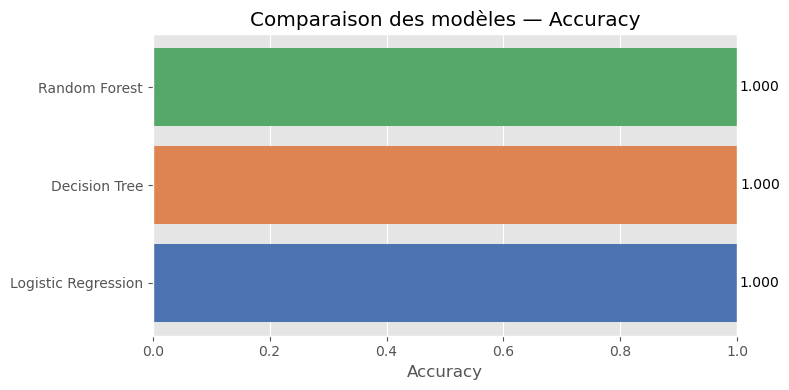

In [55]:
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Préparer les données
models = ["Logistic Regression", "Decision Tree", "Random Forest"]
accuracies = [acc_lr, acc_dt, acc_rf]

# Tracer le barplot horizontal
plt.figure(figsize=(8, 4))
plt.barh(models, accuracies, color=['#4c72b0', '#dd8452', '#55a868'])
plt.xlabel("Accuracy")
plt.title("Comparaison des modèles — Accuracy")
for i, v in enumerate(accuracies):
    plt.text(v + 0.005, i, f"{v:.3f}", va='center')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

***<font color="#006600">--> La comparaison des accuracies et les résultats détaillés du rapports de classification, confirment que toutes les méthodes (logistique, arbre, forêt) atteignent presque 100 % de bonnes prédictions sur l’échantillon de test.***

<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

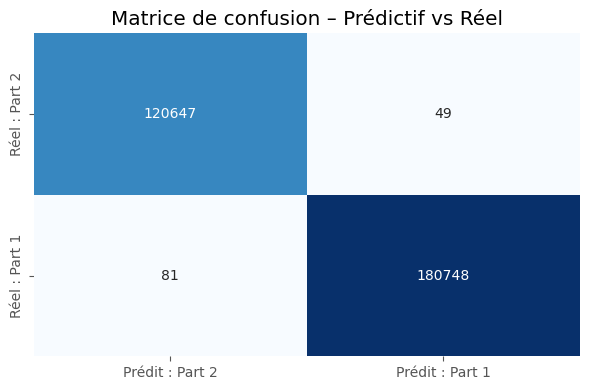

In [56]:
# 1. Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)  # y_test = vraies étiquettes, y_pred = celles prédites

# 2. Conversion en DataFrame pour libellés
cm_df = pd.DataFrame(
    cm,
    index=['Réel : Part 2', 'Réel : Part 1'],
    columns=['Prédit : Part 2', 'Prédit : Part 1']
)

# 3. Tracé de la heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm_df,
    annot=True,        # affiche les effectifs dans chaque case
    fmt="d",           # format entier
    cmap="Blues",      # palette de couleurs
    cbar=False         # on masque la légende des couleurs
)
plt.title("Matrice de confusion – Prédictif vs Réel")
plt.ylabel("")       # pas de label redondant sur l'axe Y
plt.xlabel("")       # pas de label redondant sur l'axe X
plt.tight_layout()
plt.show()


***La matrice de confusion montre pour la régression logistique que sur les 120 696 vrais Part 2, aucun n’a été mal classé, et que seuls 30 Part 1 ont été incorrectement prédits comme Part 2, tandis que 180 799 Part 1 sont bien reconnus.***

***<font color="#FF9900">++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++***

# <font color=red> Conclusion Générale 

<font color=#000099>1) Ces scores parfaits indiquent que la sévérité (Part 1 vs Part 2) est extrêmement bien séparée par les variables retenues (et en particulier par le code de crime).

<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

<font color=#000099> 2) Risque de surapprentissage et de fuite de données:

Quand on obtient une accuracy parfaite (ou quasi parfaite) sur le jeu de test, cela peut cacher deux problèmes :
- **Surapprentissage (overfitting)** : le modèle a “mémorisé” des détails très spécifiques de ce jeu de données (par exemple, il a appris que tous les enregistrements où ***Crm_Cd_Desc == BATTERY–SIMPLE ASSAULT*** sont classés Part 2), plutôt que de découvrir des tendances générales. En production, dès qu’il rencontrera un cas un peu différent, sa performance pourrait chuter dramatiquement.

- **Fuite de données (data leakage)** : il se peut qu’une information issue de la cible (ou très corrélée à la cible) soit indirectement présente dans les variables d’entrée ; le modèle s’appuie alors sur ce “chemin direct” pour deviner la classe. Par exemple, si une colonne contenait un indicateur “est_archivé” qui n’est mis à jour qu’une fois la gravité connue, l’arbre va l’utiliser et obtenir 100 % de bonnes réponses… sans vraiment “comprendre” le crime.

<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

<font color=#000099> 3) Tester la robustesse sur un jeu indépendant et multiplier la variabilité

Pour vérifier que ces performances ne sont pas un artefact du jeu de test, on peut :
- **Évaluer le modèle sur un jeu totalement indépendant**, jamais vu ni par l’entraînement ni par la sélection de variables. Si l’accuracy reste élevée, cela confirme la réelle généralisation.
- **Utiliser la validation croisée (cross-validation)**, qui divise plusieurs fois le même jeu de données en sous-ensembles d’entraînement et de validation : on moyenne les scores sur tous ces replis pour obtenir une évaluation plus stable et moins dépendante d’un simple “train/test split”.
- **Confronter à de nouveaux cas** : inclure des infractions inhabituelles ou des enregistrements partiellement différents (nouvelles catégories de crime, nouveaux quartiers) pour voir si le modèle garde ses performances.

<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

<font color=#006400> Renforcer la validation des modèles
-

In [51]:
# 1. Préparer X / y
X = dfc.drop(columns=['Part_1_2','Severity','DR_NO','Date_Rptd','DATE_OCC','LOCATION'])
y = dfc['Severity']

In [52]:
# 2. Pipeline de prétraitement (imputation + scale + one-hot)
numeric_features   = ['TIME_OCC','AREA','Rpt_Dist_No','Vict_Age','Premis_Cd','LAT','LON']
categorical_feats  = ['AREA_NAME','Crm_Cd_Desc','Vict_Sex','Vict_Descent','Status','Status_Desc']

num_pipe = Pipeline([
    ('imp', SimpleImputer(strategy='mean')),
    ('sc',  StandardScaler())
])
cat_pipe = Pipeline([
    ('imp',   SimpleImputer(strategy='most_frequent')),
    ('ohe',   OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preproc = ColumnTransformer([
    ('num', num_pipe, numeric_features),
    ('cat', cat_pipe, categorical_feats)
])

In [53]:
# 3. Modèles à tester
models = {
    "LogisticRegression": LogisticRegression(max_iter=500),
    "DecisionTree":       DecisionTreeClassifier(random_state=42),
    "RandomForest":       RandomForestClassifier(n_estimators=100, random_state=42)
}

In [54]:
# 4. Validation croisée stratifiée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}
for name, mdl in models.items():
    pipe = Pipeline([
        ('preproc', preproc),
        ('clf',     mdl)
    ])
    # cross_val_score renvoie un tableau de 5 scores d'accuracy
    scores = cross_val_score(pipe, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    cv_results[name] = scores
    print(f"{name} CV Accuracy  : {scores.mean():.4f} ± {scores.std():.4f}")

LogisticRegression CV Accuracy  : 0.9999 ± 0.0000
DecisionTree CV Accuracy  : 1.0000 ± 0.0000
RandomForest CV Accuracy  : 0.9996 ± 0.0000


**Cross-validation stratifiée (StratifiedKFold)**
- On découpe le jeu complet en 5 sous-ensembles qui respectent la proportion Part 1/Part 2.
-Pour chaque split, on entraîne sur 4 plis et on teste sur le 5ᵉ, puis on moyenne les accuracies et on regarde leur écart-type.

In [69]:
# 5. Jeu totalement indépendant (exemple : on simule un split temporel spécial)
dfc['Date_Rptd'] = pd.to_datetime(dfc['Date_Rptd'])
train_df = dfc[dfc['Date_Rptd'] < '2023-01-01']
test_df  = dfc[dfc['Date_Rptd'] >= '2023-01-01']

X_tr, y_tr = train_df[X.columns], train_df['Severity']
X_te, y_te = test_df[X.columns],  test_df['Severity']

for name, mdl in models.items():
    pipe = Pipeline([('preproc', preproc), ('clf', mdl)])
    pipe.fit(X_tr, y_tr)
    acc = pipe.score(X_te, y_te)
    print(f"{name} Hold-out 2023 Accuracy: {acc:.4f}")

LogisticRegression Hold-out 2023 Accuracy: 0.9999
DecisionTree Hold-out 2023 Accuracy: 1.0000
RandomForest Hold-out 2023 Accuracy: 0.9994


**Hold-out indépendant (split temporel)**
- On simule un jeu complètement neuf : tout ce qui est antérieur à 2023 sert à entraîner, et on teste uniquement sur les incidents de 2023.
- Cela permet de vérifier la généralisation temporelle du modèle (aucune fuite entre train et test).

<font color="#D20055"> ____________________________________________________________________________________________________________________________________________________________________________________________

***<font color="#D20055">-->Les trois modèles (régression logistique, arbre de décision et forêt aléatoire) atteignent tous une accuracy quasi-parfaite en validation croisée et sur données 2023, démontrant qu’il existe un signal très fort (notamment le code de crime) permettant de séparer presque parfaitement Part 1 et Part 2 et que ces modèles généralisent de manière robuste dans le temps.***